In [1]:
# Instalação das bibliotecas necessárias
!pip install pandas numpy matplotlib seaborn plotly tqdm

Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22066888 entries, 0 to 22066887
Data columns (total 11 columns):
 #   Column               Dtype         
---  ------               -----         
 0   searchDate           datetime64[ns]
 1   flightDate           datetime64[ns]
 2   startingAirport      object        
 3   destinationAirport   object        
 4   totalFare            float64       
 5   segmentsAirlineName  object        
 6   dias_ate_voo         int64         
 7   mes_voo              int32         
 8   dia_semana_voo       int32         
 9   mes_pesquisa         int32         
 10  dia_semana_pesquisa  int32         
dtypes: datetime64[ns](2), float64(1), int32(4), int64(1), object(3)
memory usage: 1.5+ GB
None

Estatísticas Descritivas:
                          searchDate                     flightDate  \
count                       22066888                       22066888   
mean   2022-07-10 03:30:19.761519616  2022-08-06 10:08:50.11088

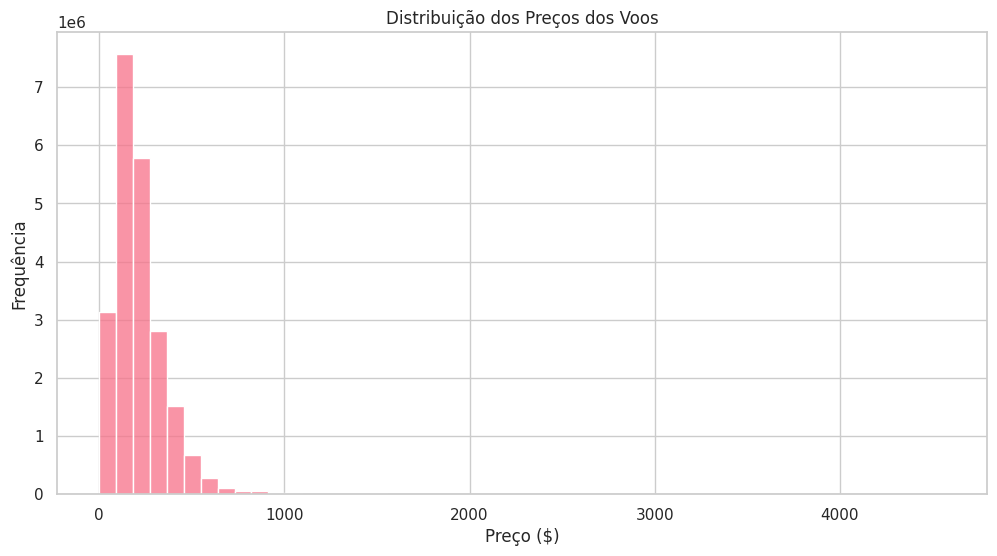

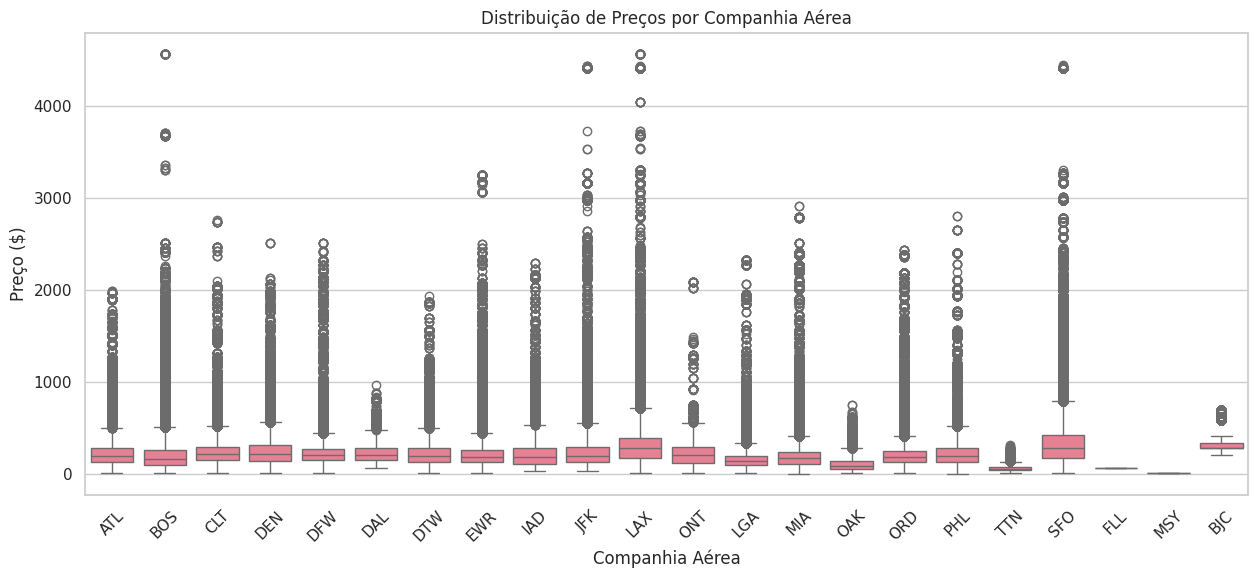

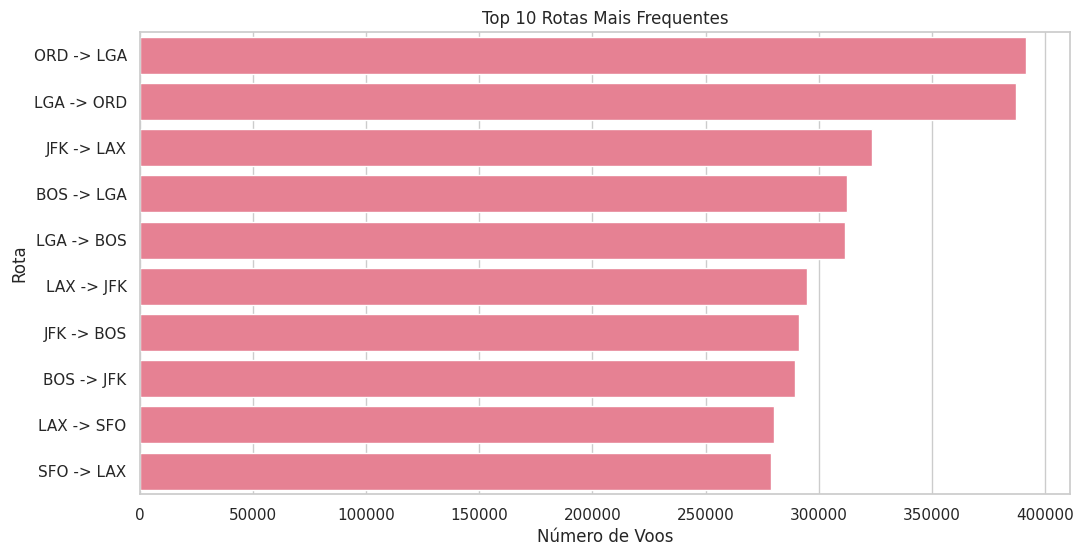

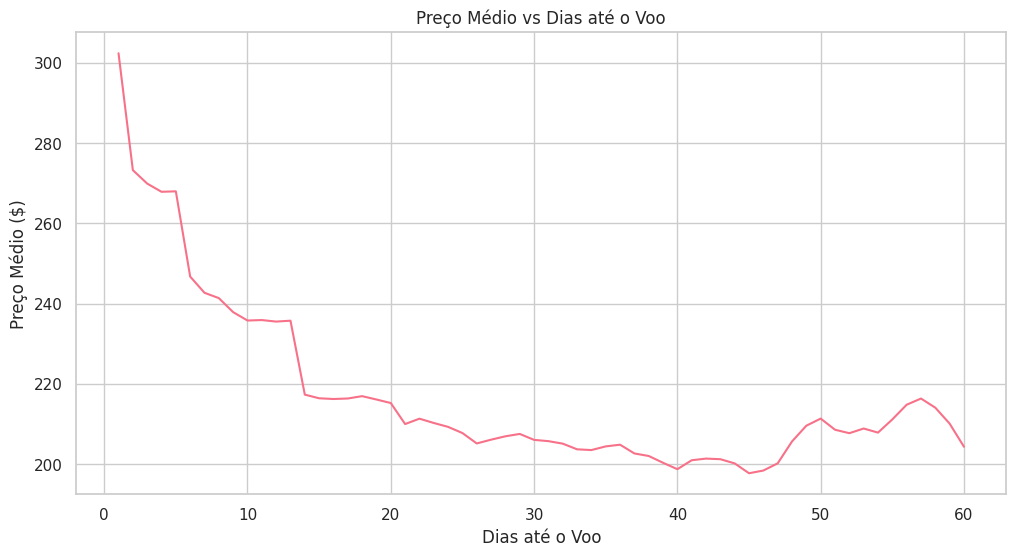

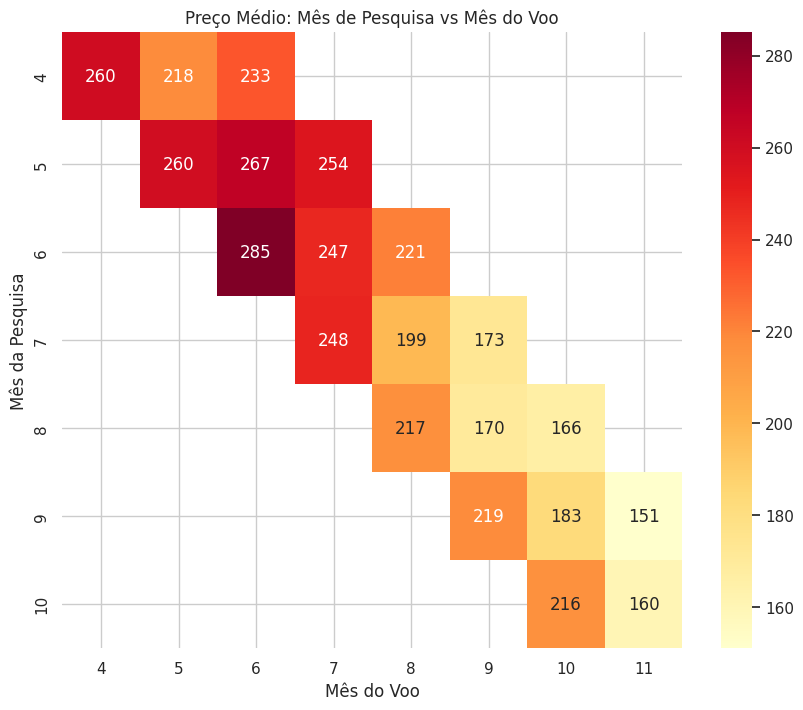


Insights Principais:
preco_medio: 219.12296876478467
preco_mediano: 186.98
rota_mais_cara: searchDate             2022-09-08 00:00:00
flightDate             2022-09-10 00:00:00
startingAirport                        BOS
destinationAirport                     LAX
totalFare                          4566.51
segmentsAirlineName                    BOS
dias_ate_voo                             2
mes_voo                                  9
dia_semana_voo                           5
mes_pesquisa                             9
dia_semana_pesquisa                      3
Name: 18792590, dtype: object
rota_mais_barata: searchDate             2022-08-26 00:00:00
flightDate             2022-09-21 00:00:00
startingAirport                        PHL
destinationAirport                     MIA
totalFare                             0.01
segmentsAirlineName                    PHL
dias_ate_voo                            26
mes_voo                                  9
dia_semana_voo                           2


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from tqdm import tqdm
from google.colab import drive


# Configurações para melhor visualização
sns.set_theme(style="whitegrid")
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

# Carregar os dados do Google Drive
caminho_arquivo = '/content/drive/MyDrive/ProjetoIA/voos_filtrados.csv'
df = pd.read_csv(caminho_arquivo)


# Converter colunas de data para datetime
df['searchDate'] = pd.to_datetime(df['searchDate'])
df['flightDate'] = pd.to_datetime(df['flightDate'])

# Feature engineering inicial
df['dias_ate_voo'] = (df['flightDate'] - df['searchDate']).dt.days
df['mes_voo'] = df['flightDate'].dt.month
df['dia_semana_voo'] = df['flightDate'].dt.dayofweek
df['mes_pesquisa'] = df['searchDate'].dt.month
df['dia_semana_pesquisa'] = df['searchDate'].dt.dayofweek

# Análise básica
print("Informações do Dataset:")
print(df.info())
print("\nEstatísticas Descritivas:")
print(df.describe())
print("\nValores Nulos:")
print(df.isnull().sum())

# Visualizações

# 1. Distribuição de Preços
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='totalFare', bins=50)
plt.title('Distribuição dos Preços dos Voos')
plt.xlabel('Preço ($)')
plt.ylabel('Frequência')
plt.show()

# 2. Box Plot de Preços por Companhia Aérea
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='segmentsAirlineName', y='totalFare')
plt.xticks(rotation=45)
plt.title('Distribuição de Preços por Companhia Aérea')
plt.xlabel('Companhia Aérea')
plt.ylabel('Preço ($)')
plt.show()

# 3. Rotas mais comuns
top_routes = df.groupby(['startingAirport', 'destinationAirport']).size().reset_index(name='count')
top_routes = top_routes.sort_values('count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_routes, x='count', y=top_routes.apply(lambda x: f"{x['startingAirport']} -> {x['destinationAirport']}", axis=1))
plt.title('Top 10 Rotas Mais Frequentes')
plt.xlabel('Número de Voos')
plt.ylabel('Rota')
plt.show()

# 4. Preço médio por dias até o voo
plt.figure(figsize=(12, 6))
df.groupby('dias_ate_voo')['totalFare'].mean().plot()
plt.title('Preço Médio vs Dias até o Voo')
plt.xlabel('Dias até o Voo')
plt.ylabel('Preço Médio ($)')
plt.show()

# 5. Heatmap de preços médios por mês de pesquisa vs mês de voo
pivot_table = df.pivot_table(
    values='totalFare',
    index='mes_pesquisa',
    columns='mes_voo',
    aggfunc='mean'
)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Preço Médio: Mês de Pesquisa vs Mês do Voo')
plt.xlabel('Mês do Voo')
plt.ylabel('Mês da Pesquisa')
plt.show()

#Insights importantes
insights = {
    'preco_medio': df['totalFare'].mean(),
    'preco_mediano': df['totalFare'].median(),
    'rota_mais_cara': df.loc[df['totalFare'].idxmax()],
    'rota_mais_barata': df.loc[df['totalFare'].idxmin()],
    'dias_antecedencia_media': df['dias_ate_voo'].mean()
}

print("\nInsights Principais:")
for k, v in insights.items():
    print(f"{k}: {v}")